## 10 - Observations and Insights 

1) For the mouse weight vs the average tumor volume for the Capomulin regimen, it showed a correlation of 0.84, which shows that there is a positive correlation between the two sets of data.

2) From the boxplot and IQR that was calculated, it can be seen that Capomulin and Ramicane were the two most effective regimens as all of their data is significantlly lower that the next two regimens, Infubinol and Ceftamin

3) Also, Capomulin and Ramicane do both have the first and second highest numner of mice per data point compared to the rest of the regimens. They are at 230 and 228 where the next highest is at 188. This could be because of the success of the regimens where the mice are able to continue longer.

## 1 - Cleaning Data

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse = pd.merge(study_results, mouse_metadata, on="Mouse ID")
combined_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice in the DataFrame.
number_mice = combined_mouse["Mouse ID"].value_counts()

number_mice

#249 mice from length

g989    13
l897    10
a401    10
e662    10
s508    10
        ..
f932     1
t573     1
b447     1
v199     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
timepoint_data = combined_mouse["Timepoint"].value_counts()

timepoint_data

#see that there are 1 more mice that started at 0 from what we saw before. Must bt g989 since it occured more than the maximum 10 times

0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_mouse_index = combined_mouse.set_index("Mouse ID")
g989 = combined_mouse_index.loc["g989", :]
g989

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_mouse_clean = combined_mouse_index.drop(index = "g989")
updated_mouse = combined_mouse_clean.reset_index()
updated_mouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.

number_mice_clean = updated_mouse["Mouse ID"].value_counts()

number_mice_clean

#248 mice now 

y163    10
v991    10
e662    10
w422    10
q633    10
        ..
f932     1
t573     1
b447     1
v199     1
l872     1
Name: Mouse ID, Length: 248, dtype: int64

In [7]:
qwe = updated_mouse["Drug Regimen"].value_counts()

qwe

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

## 2 - Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regiment
# This method is the most straightforward, creating multiple series and putting them all together at the end.

summary = updated_mouse[["Drug Regimen", "Tumor Volume (mm3)"]]
summary_statistics = summary.groupby(["Drug Regimen"])

In [9]:
#mean
summary_mean = summary_statistics["Tumor Volume (mm3)"].mean()
summary_mean

#median
summary_median = summary_statistics["Tumor Volume (mm3)"].median()
summary_median

#variance
summary_variance = summary_statistics["Tumor Volume (mm3)"].var()
summary_variance

#standard deviation
summary_standard_deviation = summary_statistics["Tumor Volume (mm3)"].std()
summary_standard_deviation

#SEM
summary_sem = summary_statistics["Tumor Volume (mm3)"].sem()
summary_sem


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [10]:
summary_statistics_df = pd.DataFrame({"Mean": summary_mean, 
                                      "Median": summary_median,
                                      "Variance": summary_variance,
                                      "Standard Deviation": summary_standard_deviation,
                                      "SEM": summary_sem})
summary_statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

sum_stat_df = summary_statistics.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
sum_stat_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## 3 - Bar Plots

In [12]:
bar_plot_mice = updated_mouse.groupby(["Drug Regimen"]).count()["Mouse ID"]
bar_plot_mice

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Number of Mice Per Time Point')

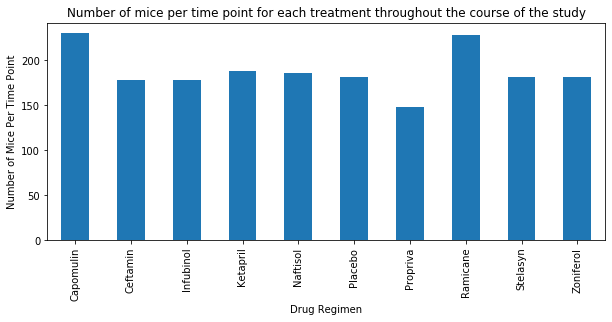

In [13]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

bar_plot_mice.plot(kind="bar", figsize=(10,4))

plt.title("Number of mice per time point for each treatment throughout the course of the study")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Per Time Point")



Text(0, 0.5, 'Number of Mice Per Time Point')

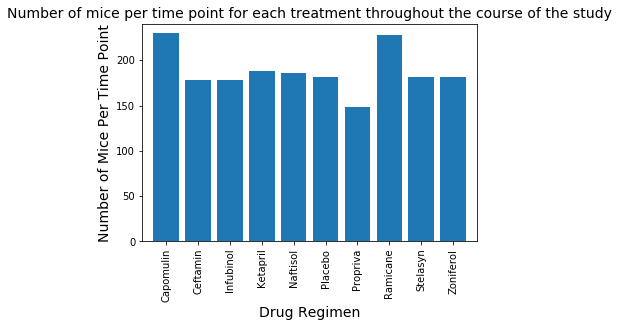

In [14]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(bar_plot_mice))
tick_locations = [value for value in x_axis]


plt.bar(x_axis, bar_plot_mice, align="center")

plt.xticks(tick_locations, list(bar_plot_mice.index), rotation="vertical")
    
    
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(bar_plot_mice)+10)

plt.title("Number of mice per time point for each treatment throughout the course of the study", fontsize = 14)
plt.xlabel("Drug Regimen", fontsize = 14)
plt.ylabel("Number of Mice Per Time Point", fontsize = 14)



## 4 - Pie Plots

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

group_pie = updated_mouse.groupby("Sex")
group_pie_count = pd.DataFrame(group_pie["Sex"].count())
group_pie_count




,Sex
Sex,
Female,922
Male,958


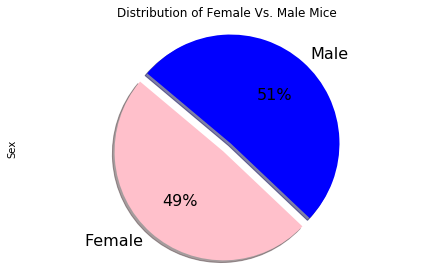

In [16]:
group_pie_count.plot.pie(y="Sex", fontsize=16, title="Distribution of Female Vs. Male Mice", explode=(0.1, 0), 
                         startangle=140, autopct="%1.f%%", shadow=True, colors=["pink", "blue"], legend=False)

plt.tight_layout()
plt.axis("equal")
plt.show()

C:\Users\mhoun\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


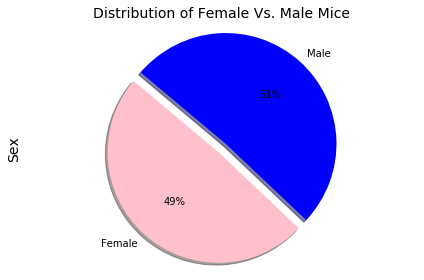

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

genders = list(group_pie_count.index.values)

plt.pie(group_pie_count, labels=genders, colors=["pink", "blue"], 
        explode=(0.1, 0), startangle=140, autopct="%1.f%%", shadow=True) 


plt.title("Distribution of Female Vs. Male Mice", fontsize = 14)
plt.ylabel("Sex", fontsize = 14)
plt.axis("equal", fontsize = 14)
plt.tight_layout()
plt.show()

## 5 - Quartiles, Outliers and 6 - Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.

four_best_drugs_list = ["Capomulin", 
                  "Ramicane", 
                  "Infubinol", 
                  "Ceftamin"]

four_best_drugs = updated_mouse[updated_mouse["Drug Regimen"].isin(four_best_drugs_list)]

four_best_drugs




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


In [19]:
four_final_tumor = four_best_drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(
    final_tumor_volume=('Tumor Volume (mm3)',lambda x: x.iloc[-1]))

#just to show all the mice
pd.set_option('display.max_rows', None)

four_final_tumor

final_tumor_volume
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
             i557               47.685963
             i738               37.311846
             j119               38.125164
             j246               38.753265
             l509               41.483008
             l897               38.846876
             m601               28.430964
             m957               33.329098
             r157               46.539206
             r554               32.377357
             r944               41.581521
             s185               23.343598
             s710               40.728578
             t565               34.455298
             u364               31.023923
             v923               40.658124
             w150               39.952347
             w914               36.041047
             x401               28.484033
             y793               31.896238
Ceftamin     a275               62.999356
             b447               45.000000
             b487               56.057749
             b759               55.742829
             f436               48.722078
             h531               47.784682
             j296               61.849023
             k210               68.923185
             l471               67.748662
             l490               57.918381
             l558               46.784535
             l661               59.851956
             l733               64.299830
             o287               59.741901
             p438               61.433892
             q483               64.192341
             t573               45.000000
             u149               52.925348
             u153               45.000000
             w151               67.527482
             x226               45.000000
             x581               64.634949
             x822               61.386660
             y769               68.594745
             y865               64.729837
Infubinol    a203               67.973419
             a251               65.525743
             a577               57.031862
             a685               66.083066
             c139               72.226731
             c326               36.321346
             c895               60.969711
             e476               62.435404
             f345               60.918767
             i386               67.289621
             k483               66.196912
             k804               62.117279
             m756               47.010364
             n671               60.165180
             o809               55.629428
             o813               45.699331
             q132               54.656549
             s121               55.650681
             v339               46.250112
             v719               54.048608
             v766               51.542431
             w193               50.005138
             w584               58.268442
             y163               67.685569
             z581               62.754451
Ramicane     a411               38.407618
             a444               43.047543
             a520               38.810366
             a644               32.978522
             c458               38.342008
             c758               33.397653
             d251               37.311236
             e662               40.659006
             g791               29.128472
             i177               33.562402
             i334               36.374510
             j913               31.560470
             j989               36.134852
             k403               22.050126
             m546               30.564625
             n364               31.095335
             q597               45.220869
             q610               36.561652
             r811               3

In [20]:
#needed to reset unless you want everything to show a lot of rows, reset dataframe

pd.reset_option("max_rows")

four_final_tumor_update = four_final_tumor.stack(level=0).unstack(level=0)
four_final_tumor_update

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,final_tumor_volume,NaN,NaN,67.973419,NaN
a251,final_tumor_volume,NaN,NaN,65.525743,NaN
a275,final_tumor_volume,NaN,62.999356,NaN,NaN
a411,final_tumor_volume,NaN,NaN,NaN,38.407618
a444,final_tumor_volume,NaN,NaN,NaN,43.047543
...,...,...,...,...,...
y769,final_tumor_volume,NaN,68.594745,NaN,NaN
y793,final_tumor_volume,31.896238,NaN,NaN,NaN
y865,final_tumor_volume,NaN,64.729837,NaN,NaN


In [21]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

counter = 0

for drug in four_best_drugs_list:
    quartiles = four_final_tumor_update[drug].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = (upperq- lowerq)
    lower_bound = (lowerq-(1.5*iqr))
    upper_bound = (upperq+(1.5*iqr))
    
    if counter == 0:
       print(f" ")
    print(f"{drug} IQR:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f" ")

    counter += 1

 
Capomulin IQR:
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 for Capomulin could be outliers.
Values above 51.83201549 for Capomulin could be outliers.
 
Ramicane IQR:
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 for Ramicane could be outliers.
Values above 54.30681135 for Ramicane could be outliers.
 
Infubinol IQR:
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 for Infubinol could be outliers.
Values above 82.74144559000001 for Infub

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

boxplot_list = []

for drug in four_best_drugs_list:
    boxplot_list.append(list(four_final_tumor_update[drug].dropna()))

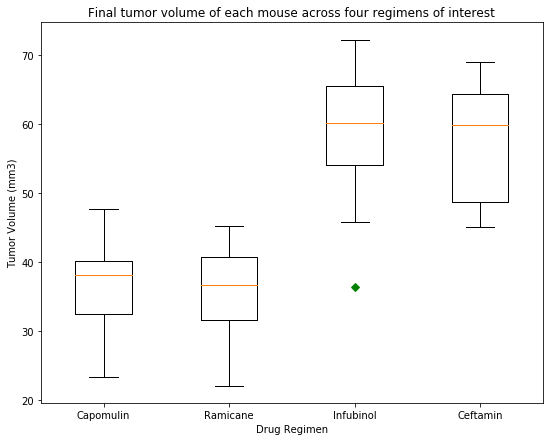

In [23]:
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title("Final tumor volume of each mouse across four regimens of interest")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Volume (mm3)")
ax.boxplot(boxplot_list,notch=0,sym="gD")
plt.xticks([1,2,3,4],four_best_drugs_list)

plt.show()

## 7 - Line and 8 - Scatter Plots

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_search = updated_mouse.loc[updated_mouse["Drug Regimen"] == "Capomulin"]
mouse_search

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


In [25]:
capomulin_df = updated_mouse.loc[updated_mouse["Mouse ID"] == "m601"]
capomulin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1870,m601,0,45.000000,0,Capomulin,Male,22,17
1871,m601,5,41.408591,1,Capomulin,Male,22,17
1872,m601,10,36.825367,1,Capomulin,Male,22,17
1873,m601,15,35.464612,1,Capomulin,Male,22,17
1874,m601,20,34.255732,1,Capomulin,Male,22,17
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17
1879,m601,45,28.430964,1,Capomulin,Male,22,17


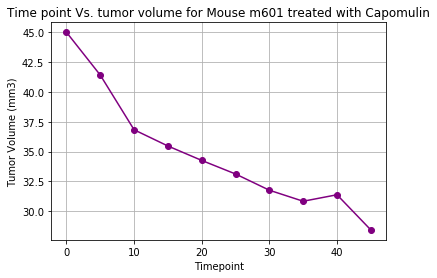

In [26]:
x_axis1 = capomulin_df["Timepoint"]
tumor = capomulin_df["Tumor Volume (mm3)"]

plt.plot(x_axis1, tumor, marker="o", color="purple", )
plt.title("Time point Vs. tumor volume for Mouse m601 treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)


plt.show()




In [27]:
mouse_search

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


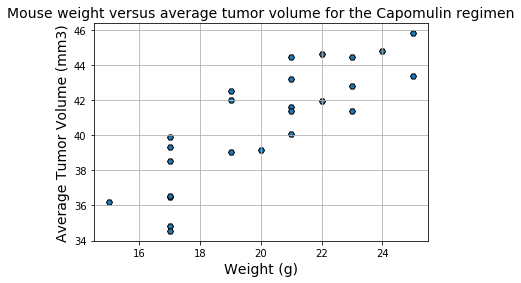

In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight = mouse_search.groupby(["Mouse ID"]).mean()

plt.scatter(mouse_weight["Weight (g)"], mouse_weight["Tumor Volume (mm3)"], marker="H", edgecolors="black")


plt.title("Mouse weight versus average tumor volume for the Capomulin regimen", fontsize = 14)
plt.xlabel("Weight (g)", fontsize = 14)
plt.ylabel("Average Tumor Volume (mm3)", fontsize = 14)
plt.grid(True)


plt.show()


## 9 - Correlation and Regression

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(mouse_weight["Weight (g)"], mouse_weight["Tumor Volume (mm3)"])

print(f"The correlation coefficient between mouse weight and \
average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


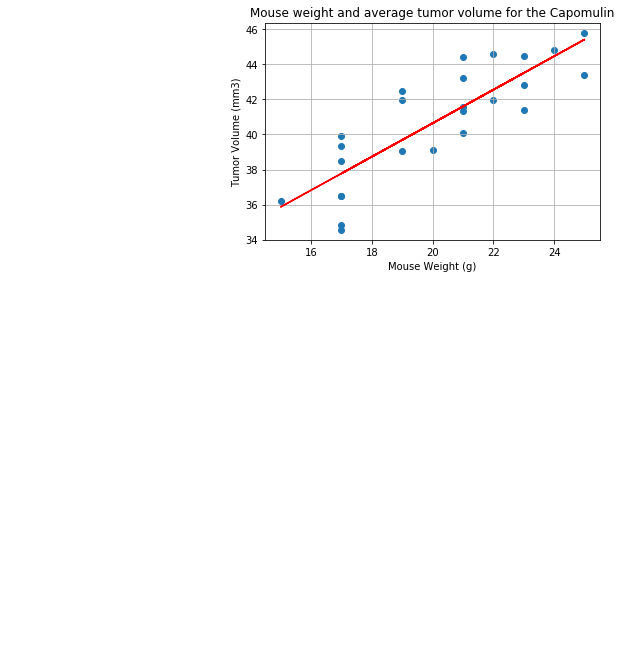

The Linear Regression is y = 0.95x + 21.55


In [30]:
x_values = mouse_weight["Weight (g)"]
y_values = mouse_weight["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Mouse weight and average tumor volume for the Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.show()

print(f"The Linear Regression is {line_eq}")